# Problem statement: 
To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution that can evaluate images and alert dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.



# Data Summary:

The dataset consists of 2357 images of malignant and benign oncological diseases, which were formed from the International Skin Imaging Collaboration (ISIC). All images were sorted according to the classification taken with ISIC, and all subsets were divided into the same number of images, with the exception of melanomas and moles, whose images are slightly dominant.

The data set contains the following diseases:

1. Actinic keratosis
2. Basal cell carcinoma
3. Dermatofibroma
4. Melanoma
5. Nevus
6. Pigmented benign keratosis
7. Seborrheic keratosis
8. Squamous cell carcinoma
9. Vascular lesion


## Importing all the important libraries

In [110]:
import os
if not os.path.exists('data'):
  os.mkdir('data')

In [111]:
import os
import numpy as np
import pandas as pd
import glob   
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers
from tensorflow.keras.models import Sequential
from IPython.display import SVG
import scipy.misc
from matplotlib.pyplot import imshow
%matplotlib inline

In [112]:
import pathlib
import PIL
import matplotlib.pyplot as plt

In [113]:
tf.test.gpu_device_name()

'/device:GPU:0'

- Mounting google drive as we are going to use data from google drive

In [114]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


- To check the folder and files in the google colab 

In [115]:
!ls -lha /content/data/

total 8.0K
drwxr-xr-x 2 root root 4.0K Aug 17 13:17 .
drwxr-xr-x 1 root root 4.0K Aug 17 11:10 ..


In [116]:
!ls -lha "/content/drive/MyDrive/Colab Notebooks/Melanoma Detection Assignment"

total 1.5M
-rw------- 1 root root 1.5M Aug 17 13:18 RajashekarE_nn.ipynb
drwx------ 4 root root 4.0K Aug 17 01:04 Skin_cancer_ISIC_data


In [117]:
!ls -lha "/content/drive/MyDrive/Colab Notebooks/Melanoma Detection Assignment/Skin_cancer_ISIC_data"

total 8.0K
drwx------ 11 root root 4.0K Aug 17 01:04 Test
drwx------ 11 root root 4.0K Aug 17 01:04 Train


- Copy the dataset into local content folder of google colab

In [118]:
!cp -pr "/content/drive/MyDrive/Colab Notebooks/Melanoma Detection Assignment/Skin_cancer_ISIC_data" "/content/data/"

In [119]:
!ls -lrh "/content/data/Skin_cancer_ISIC_data/Train/"

total 104K
drwx------ 2 root root 4.0K Aug 17 01:04 'vascular lesion'
drwx------ 2 root root  12K Aug 17 01:04 'squamous cell carcinoma'
drwx------ 2 root root 4.0K Aug 17 01:04 'seborrheic keratosis'
drwx------ 2 root root  20K Aug 17 01:04 'pigmented benign keratosis'
drwx------ 2 root root  16K Aug 17 01:04  nevus
drwx------ 2 root root  20K Aug 17 01:04  melanoma
drwx------ 2 root root 4.0K Aug 17 01:04  dermatofibroma
drwx------ 2 root root  20K Aug 17 01:04 'basal cell carcinoma'
drwx------ 2 root root 4.0K Aug 17 01:04 'actinic keratosis'


In [120]:
!ls -lrh "/content/data/Skin_cancer_ISIC_data/Test/"

total 36K
drwx------ 2 root root 4.0K Aug 17 01:04 'vascular lesion'
drwx------ 2 root root 4.0K Aug 17 01:04 'squamous cell carcinoma'
drwx------ 2 root root 4.0K Aug 17 01:04 'seborrheic keratosis'
drwx------ 2 root root 4.0K Aug 17 01:04 'pigmented benign keratosis'
drwx------ 2 root root 4.0K Aug 17 01:04  nevus
drwx------ 2 root root 4.0K Aug 17 01:04  melanoma
drwx------ 2 root root 4.0K Aug 17 01:04  dermatofibroma
drwx------ 2 root root 4.0K Aug 17 01:04 'basal cell carcinoma'
drwx------ 2 root root 4.0K Aug 17 01:04 'actinic keratosis'


## Note :- The dataset folder Skin_cancer_ISIC_data have two sub-folders i.e Train and Test. And these two folders contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

- Defining the path for train and test images

In [121]:
main_dir = "/content/data/Skin_cancer_ISIC_data/"

In [122]:
data_dir_train = pathlib.Path(main_dir + "Train")
data_dir_test = pathlib.Path(main_dir + "Test")

In [123]:
print(data_dir_train)

/content/data/Skin_cancer_ISIC_data/Train


In [124]:
print(data_dir_test)

/content/data/Skin_cancer_ISIC_data/Test


In [125]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)

2239


In [126]:
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

118


# Create a dataset

- Define some parameters for the loader:

In [127]:
batch_size = 32
img_height = 180
img_width = 180

- Create a training dataset : Using 80% of the images for training, and 20% for validation.

In [128]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'training',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


## Create a validation dataset

In [129]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'validation',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [130]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


- To find out how many images in each subfolder in Train dataset

In [131]:
class_count = []

for i in class_names:
  class_path = pathlib.Path(main_dir + "Train/" + i)
  count = len(list(class_path.glob('*.jpg')))
  class_count.append(count)

print(class_names ,"\n" , class_count) 

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion'] 
 [114, 376, 95, 438, 357, 462, 77, 181, 139]


- To find out how many images in each subfolder in Test dataset

In [132]:
class_count = []

for i in class_names:
  class_path = pathlib.Path(main_dir + "Test/" + i)
  count = len(list(class_path.glob('*.jpg')))
  class_count.append(count)

print(class_names ,"\n" , class_count)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion'] 
 [16, 16, 16, 16, 16, 16, 3, 16, 3]


# Visualize the data

- Create a code to visualize one instance of all the nine classes present in the dataset

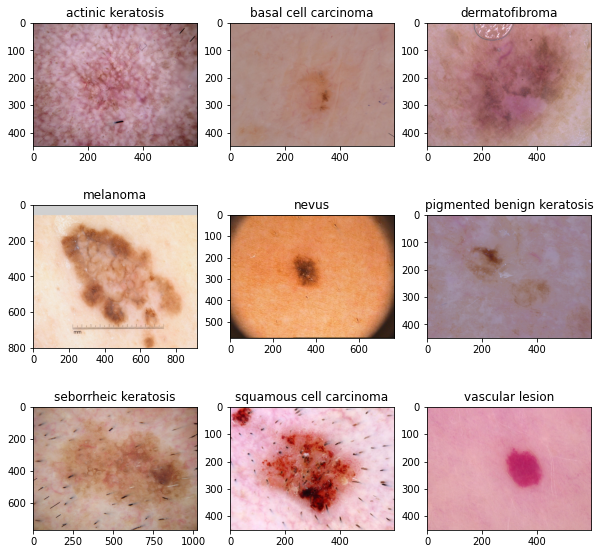

In [133]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(9): 
  plt.subplot(3, 3, i + 1)
  image = plt.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[1]))
  plt.title(class_names[i])
  plt.imshow(image)

- The image_batch is a tensor of the shape (32, 180, 180, 3). This is a batch of 32 images of shape 180x180x3 (the last dimension refers to color channels RGB). The label_batch is a tensor of the shape (32,), these are corresponding labels to the 32 images.

- Dataset.cache() keeps the images in memory after they're loaded off disk during the first epoch.

- Dataset.prefetch() overlaps data preprocessing and model execution while training.

In [134]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Create the model
- Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [135]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

Compile the model <br/>
Choose an appropirate optimiser and loss function for model training

In [136]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

- View the summary of all layers

In [137]:

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 180, 180, 32)      2432      
                                                                 
 conv2d_10 (Conv2D)          (None, 180, 180, 32)      25632     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 90, 90, 32)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 90, 90, 32)        25632     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

- Train the model

In [138]:
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


56/56 [==============================] - 16s 119ms/step - loss: 2.0657 - accuracy: 0.2009 - val_loss: 2.0243 - val_accuracy: 0.2058
Epoch 2/30
56/56 [==============================] - 4s 77ms/step - loss: 2.0302 - accuracy: 0.1992 - val_loss: 2.0408 - val_accuracy: 0.2058
Epoch 3/30
56/56 [==============================] - 4s 76ms/step - loss: 2.0261 - accuracy: 0.2081 - val_loss: 2.0263 - val_accuracy: 0.1924
Epoch 4/30
56/56 [==============================] - 4s 77ms/step - loss: 2.0073 - accuracy: 0.2148 - val_loss: 2.0083 - val_accuracy: 0.1969
Epoch 5/30
56/56 [==============================] - 4s 77ms/step - loss: 1.9108 - accuracy: 0.2796 - val_loss: 1.8766 - val_accuracy: 0.3199
Epoch 6/30
56/56 [==============================] - 4s 77ms/step - loss: 1.7206 - accuracy: 0.3650 - val_loss: 1.6619 - val_accuracy: 0.4049
Epoch 7/30
56/56 [==============================] - 4s 76ms/step - loss: 1.6355 - accuracy: 0.4113 - val_loss: 1.5645 - val_accuracy: 0.4474
Epoch 8/30
56/56 [====

# Visualizing the results

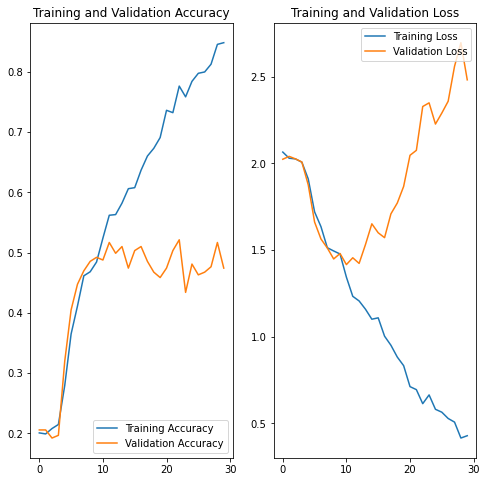

In [139]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

- Finding on the first base model

- The model is overfitting because we can also see difference in loss functions in training & test around the 10-11th epoch

- The accuracy is just around 75-80% because there are enough features to remember the pattern.

- But again, it's too early to comment on the overfitting & underfitting debate

In [140]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
data_augument = keras.Sequential([
                             layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical",input_shape=(img_height,img_width,3)),
                             layers.experimental.preprocessing.RandomRotation(0.2, fill_mode='reflect'),
                             layers.experimental.preprocessing.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), fill_mode='reflect')
])

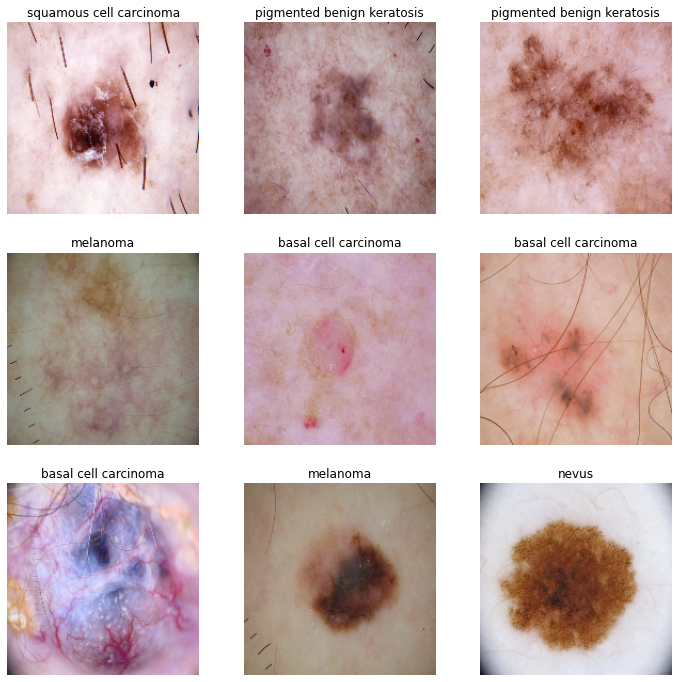

In [141]:
## visualize how your augmentation strategy works for one instance of training image.

plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(data_augument(images)[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

# Create the model, compile and train the model

In [142]:
## You can use Dropout layer if there is an evidence of overfitting in your findings
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([ data_augument,
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
      
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

In [143]:
# Compiling the model

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [144]:
# View the summary of all layers
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_4 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_14 (Conv2D)          (None, 180, 180, 32)      2432      
                                                                 
 conv2d_15 (Conv2D)          (None, 180, 180, 32)      25632     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 90, 90, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 90, 90, 64)        51264     
                                                      

- Training the model

In [145]:
epochs=30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
56/56 [==============================] - 6s 90ms/step - loss: 2.0523 - accuracy: 0.2076 - val_loss: 2.0333 - val_accuracy: 0.1924
Epoch 2/30
56/56 [==============================] - 5s 86ms/step - loss: 2.0326 - accuracy: 0.1892 - val_loss: 2.0325 - val_accuracy: 0.1924
Epoch 3/30
56/56 [==============================] - 5s 86ms/step - loss: 2.0625 - accuracy: 0.2070 - val_loss: 2.0474 - val_accuracy: 0.1924
Epoch 4/30
56/56 [==============================] - 5s 86ms/step - loss: 2.0249 - accuracy: 0.2087 - val_loss: 2.0311 - val_accuracy: 0.2058
Epoch 5/30
56/56 [==============================] - 5s 86ms/step - loss: 2.0254 - accuracy: 0.1998 - val_loss: 2.0332 - val_accuracy: 0.2058
Epoch 6/30
56/56 [==============================] - 5s 86ms/step - loss: 2.0161 - accuracy: 0.1992 - val_loss: 2.0212 - val_accuracy: 0.2081
Epoch 7/30
56/56 [==============================] - 5s 86ms/step - loss: 2.2743 - accuracy: 0.1964 - val_loss: 2.0216 - val_accuracy: 0.2036
Epoch 8/30
56

# Visualizing the results

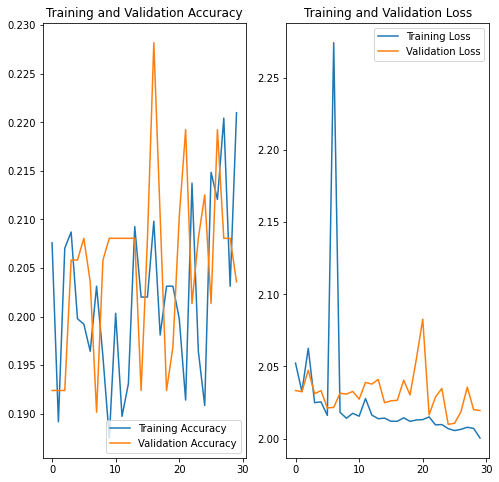

In [146]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

- Finding from Second Model

- There is no improvement in accuracy but we can definitely see the overfitting problem has solved due to data augmentation

- We can increase the epochs to increase the accuracy so it's too early for judgement

## Find the distribution of classes in the training dataset.
- Context: Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [147]:
path_list=[]
lesion_list=[]
for i in class_names:
      
    for j in data_dir_train.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,/content/data/Skin_cancer_ISIC_data/Train/acti...,actinic keratosis
1,/content/data/Skin_cancer_ISIC_data/Train/acti...,actinic keratosis
2,/content/data/Skin_cancer_ISIC_data/Train/acti...,actinic keratosis
3,/content/data/Skin_cancer_ISIC_data/Train/acti...,actinic keratosis
4,/content/data/Skin_cancer_ISIC_data/Train/acti...,actinic keratosis
...,...,...
2234,/content/data/Skin_cancer_ISIC_data/Train/vasc...,vascular lesion
2235,/content/data/Skin_cancer_ISIC_data/Train/vasc...,vascular lesion
2236,/content/data/Skin_cancer_ISIC_data/Train/vasc...,vascular lesion
2237,/content/data/Skin_cancer_ISIC_data/Train/vasc...,vascular lesion


In [148]:
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,/content/data/Skin_cancer_ISIC_data/Train/acti...,actinic keratosis
1,/content/data/Skin_cancer_ISIC_data/Train/acti...,actinic keratosis
2,/content/data/Skin_cancer_ISIC_data/Train/acti...,actinic keratosis
3,/content/data/Skin_cancer_ISIC_data/Train/acti...,actinic keratosis
4,/content/data/Skin_cancer_ISIC_data/Train/acti...,actinic keratosis
...,...,...
2234,/content/data/Skin_cancer_ISIC_data/Train/vasc...,vascular lesion
2235,/content/data/Skin_cancer_ISIC_data/Train/vasc...,vascular lesion
2236,/content/data/Skin_cancer_ISIC_data/Train/vasc...,vascular lesion
2237,/content/data/Skin_cancer_ISIC_data/Train/vasc...,vascular lesion


<BarContainer object of 9 artists>

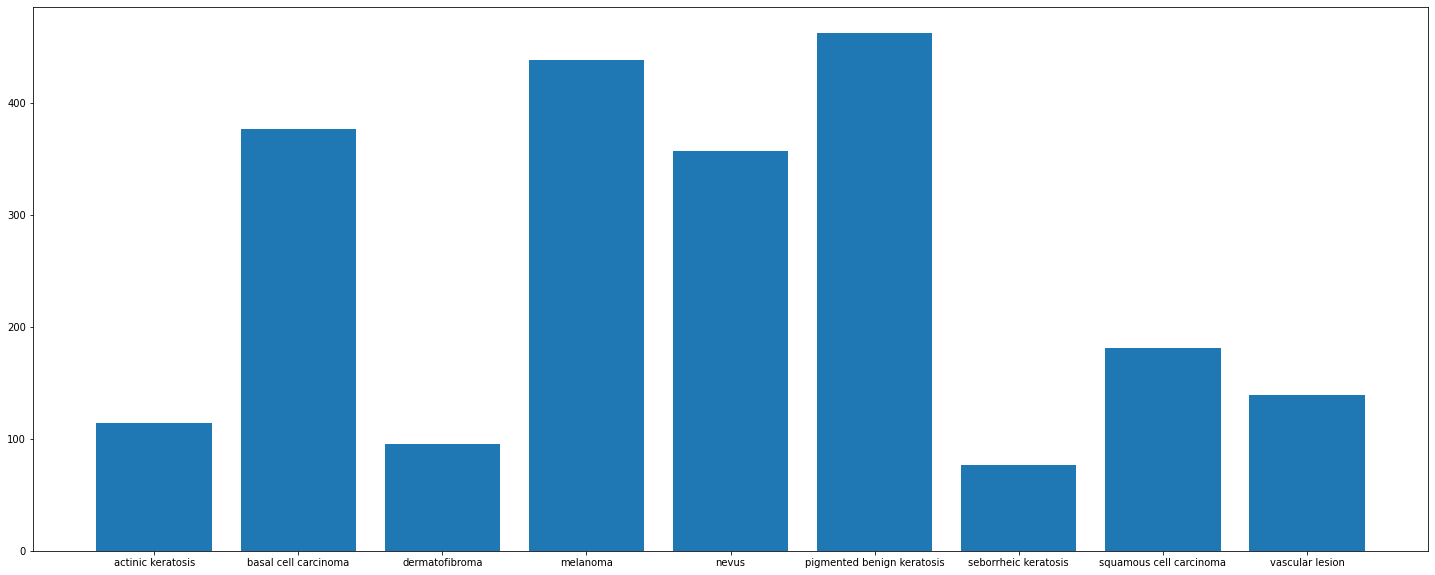

In [149]:
count=[]
for i in class_names:
    count.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_names,count)

# Q) Which class has the least number of samples?
- A) squamous cell carcinoma has least number of samples

# Q) Which classes dominate the data in terms proportionate number of samples?
- A) actinic keratosis and dermatofibroma have proportionate number of classes. melanoma and pigmented benign keratosis have proprtionate number of classes

In [150]:
class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

- Rectify the class imbalance

- Context: You can use a python package known as Augmentor (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [151]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# To use Augmentor, the following general procedure is followed:

- Instantiate a Pipeline object pointing to a directory containing your initial image data set.
Define a number of operations to perform on this data set using your Pipeline object.
Execute these operations by calling the Pipeline’s sample() method.

In [152]:
#print(data_dir_train)

import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(data_dir_train,save_format='jpg')
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 2239 image(s) found.
Output directory set to /content/data/Skin_cancer_ISIC_data/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F66A1B7A810>: 100%|██████████| 500/500 [00:53<00:00,  9.39 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/data/Skin_cancer_ISIC_data/Train/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=767x576 at 0x7F66A33554D0>: 100%|██████████| 500/500 [00:35<00:00, 14.02 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/data/Skin_cancer_ISIC_data/Train/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F66A24BAC50>: 100%|██████████| 500/500 [00:41<00:00, 12.15 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/data/Skin_cancer_ISIC_data/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F66A77452D0>: 100%|██████████| 500/500 [00:39<00:00, 12.67 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/data/Skin_cancer_ISIC_data/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F66A34BC690>: 100%|██████████| 500/500 [00:33<00:00, 14.84 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/data/Skin_cancer_ISIC_data/Train/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F66A345DA10>: 100%|██████████| 500/500 [00:38<00:00, 12.92 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/data/Skin_cancer_ISIC_data/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F66A34A0B90>: 100%|██████████| 500/500 [00:44<00:00, 11.30 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/data/Skin_cancer_ISIC_data/Train/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F66A32CCE50>: 100%|██████████| 500/500 [00:48<00:00, 10.28 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/data/Skin_cancer_ISIC_data/Train/output.

Processing <PIL.Image.Image image mode=RGB size=2048x1536 at 0x7F66A23E3850>: 100%|██████████| 500/500 [00:46<00:00, 10.84 Samples/s]


#### Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [153]:
data_dir_train1 = pathlib.Path("/content/data/Skin_cancer_ISIC_data/Train/output")
image_count_train1 = len(list(data_dir_train1.glob('*/*.jpg')))
print(image_count_train1)

4500


In [154]:
for i in class_names:
      
    for j in data_dir_train1.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
new_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
new_df

,Path,Label
0,/content/data/Skin_cancer_ISIC_data/Train/acti...,actinic keratosis
1,/content/data/Skin_cancer_ISIC_data/Train/acti...,actinic keratosis
2,/content/data/Skin_cancer_ISIC_data/Train/acti...,actinic keratosis
3,/content/data/Skin_cancer_ISIC_data/Train/acti...,actinic keratosis
4,/content/data/Skin_cancer_ISIC_data/Train/acti...,actinic keratosis
...,...,...
6734,/content/data/Skin_cancer_ISIC_data/Train/outp...,vascular lesion
6735,/content/data/Skin_cancer_ISIC_data/Train/outp...,vascular lesion
6736,/content/data/Skin_cancer_ISIC_data/Train/outp...,vascular lesion
6737,/content/data/Skin_cancer_ISIC_data/Train/outp...,vascular lesion


#### Lets see the distribution of augmented data after adding new images to the original training data.

In [155]:
new_df['Label'].value_counts()

pigmented benign keratosis    1366
melanoma                      1283
basal cell carcinoma          1152
nevus                         1098
squamous cell carcinoma        524
vascular lesion                398
actinic keratosis              366
dermatofibroma                 315
seborrheic keratosis           237
Name: Label, dtype: int64

- So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

- Train the model on the data created using Augmentor

In [156]:
batch_size = 32
img_height = 180
img_width = 180

In [157]:
import pathlib
data_dir_train1=pathlib.Path("/content/data/Skin_cancer_ISIC_data/Train/output")

In [158]:
data_dir_train1

PosixPath('/content/data/Skin_cancer_ISIC_data/Train/output')

Create a training dataset

In [159]:
image_count_train1 = len(list(data_dir_train1.glob('*/*.jpg')))
print(image_count_train1)

4500


In [161]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


data_dir_train1=pathlib.Path("/content/data/Skin_cancer_ISIC_data/Train")
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train1,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 10 classes.
Using 5392 files for training.


## Create a validation dataset

In [162]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train1,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 10 classes.
Using 1347 files for validation.


Create your model (make sure to include normalization)

In [163]:
## You can use Dropout layer if there is an evidence of overfitting in your findings
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([ 
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
      
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

- Compile your model (Choose optimizer and loss function appropriately)

In [164]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### Train your model

In [165]:
epochs =50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


169/169 [==============================] - 31s 171ms/step - loss: nan - accuracy: 0.0195 - val_loss: nan - val_accuracy: 0.0230
Epoch 2/50
169/169 [==============================] - 28s 161ms/step - loss: nan - accuracy: 0.0154 - val_loss: nan - val_accuracy: 0.0230
Epoch 3/50
169/169 [==============================] - 28s 163ms/step - loss: nan - accuracy: 0.0154 - val_loss: nan - val_accuracy: 0.0230
Epoch 4/50
169/169 [==============================] - 29s 165ms/step - loss: nan - accuracy: 0.0154 - val_loss: nan - val_accuracy: 0.0230
Epoch 5/50
169/169 [==============================] - 28s 162ms/step - loss: nan - accuracy: 0.0154 - val_loss: nan - val_accuracy: 0.0230
Epoch 6/50
169/169 [==============================] - 28s 161ms/step - loss: nan - accuracy: 0.0154 - val_loss: nan - val_accuracy: 0.0230
Epoch 7/50
169/169 [==============================] - 28s 162ms/step - loss: nan - accuracy: 0.0154 - val_loss: nan - val_accuracy: 0.0230
Epoch 8/50
169/169 [==================

### Visualize the model results

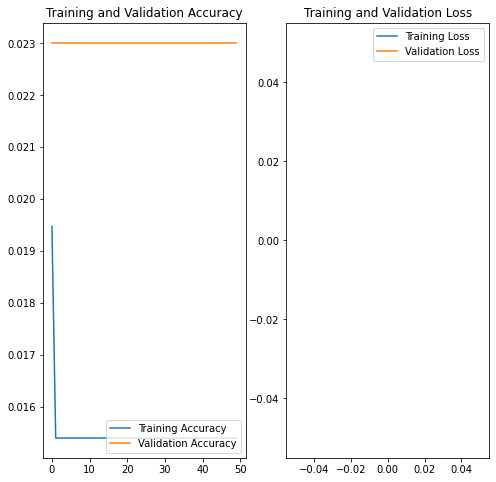

In [166]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?
- Accuracy on training data has increased by using Augmentor library

- Model is still overfitting

- The problem of overfitting can be solved by add more layer,neurons or adding dropout layers.

- The Model can be further improved by tuning the hyperparameter